In [10]:
!pip install minisom pandas seaborn matplotlib


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from minisom import MiniSom


In [12]:
# Load Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)


In [13]:
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Encode categorical features
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [14]:
# Define SOM parameters
som_size = 10  # Adjust this size based on your needs
som = MiniSom(som_size, som_size, data_scaled.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize and train the SOM
som.random_weights_init(data_scaled)
som.train(data_scaled, 1000)  # Train for 1000 iterations


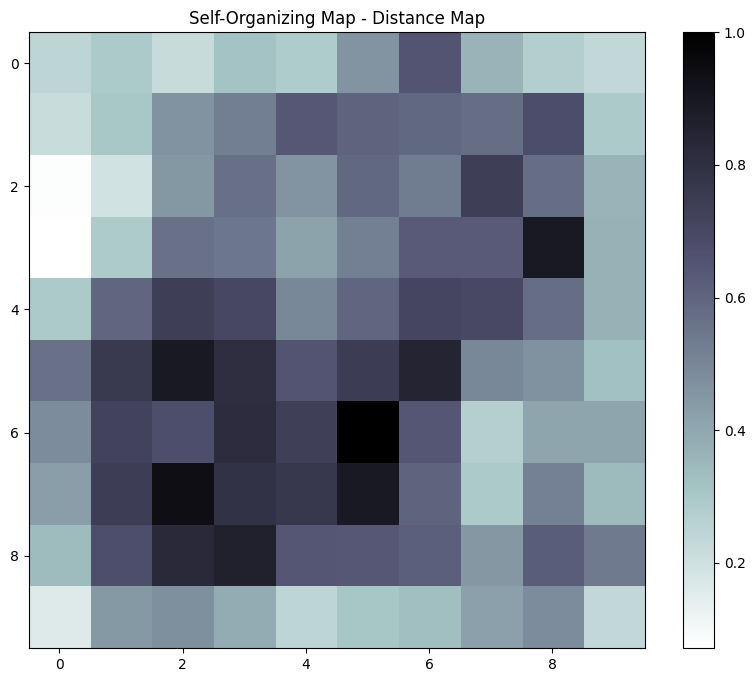

In [15]:
# Plotting the distance map
plt.figure(figsize=(10, 8))
plt.title('Self-Organizing Map - Distance Map')
plt.imshow(som.distance_map().T, cmap='bone_r')  # Transpose to match the axes
plt.colorbar()
plt.show()


In [16]:
# Get the cluster for each data point
win_map = som.win_map(data_scaled)
clusters = np.array([som.winner(x) for x in data_scaled])
data['Cluster'] = clusters[:, 0] * som_size + clusters[:, 1]  # Flatten the cluster indices


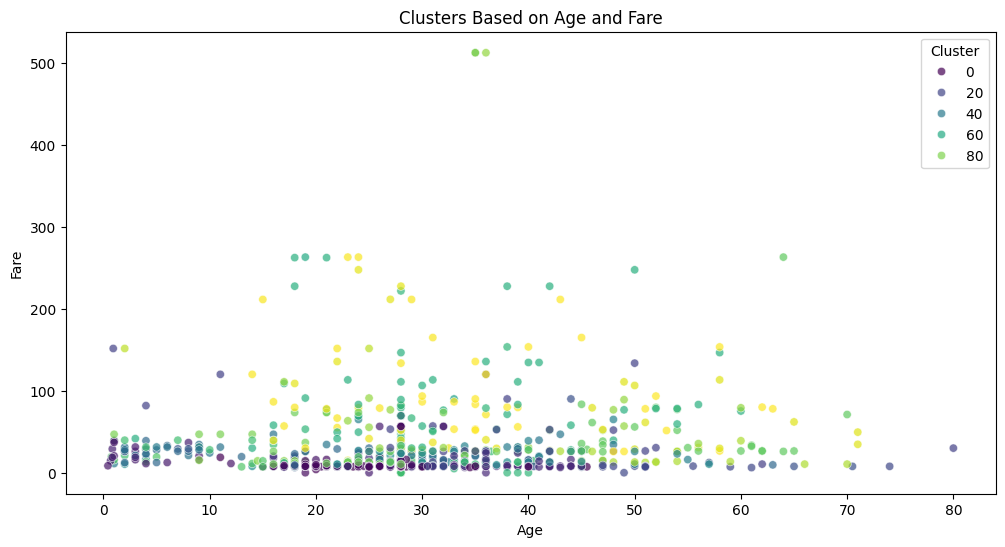

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Age', y='Fare', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Clusters Based on Age and Fare')
plt.show()


In [18]:
# Count the number of instances in each cluster
cluster_counts = data['Cluster'].value_counts()


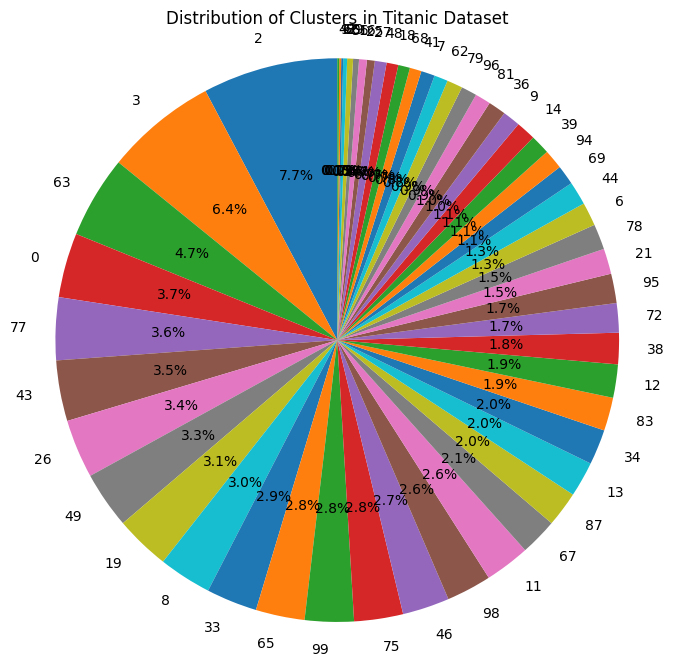

In [19]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Clusters in Titanic Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


<ipython-input-22-1f532d4c45fa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


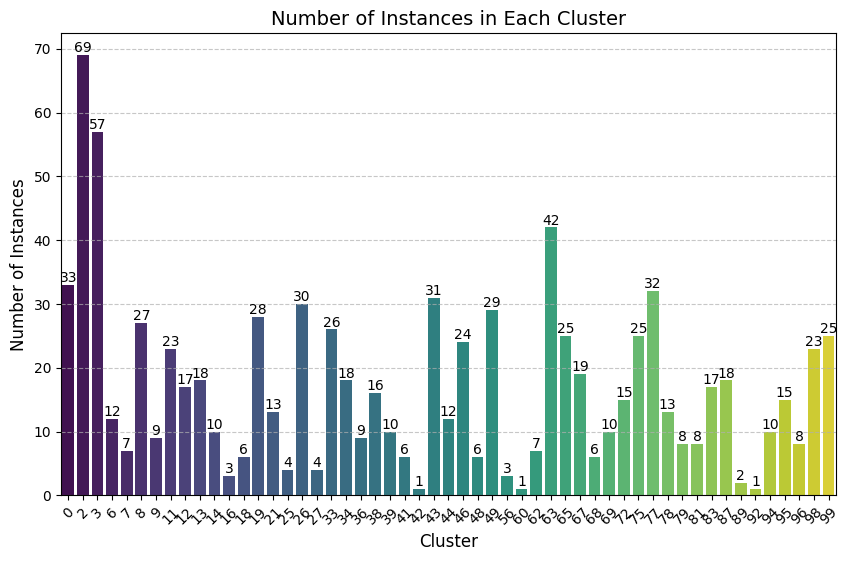

In [22]:
# Create a detailed bar graph
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')

# Add value annotations on top of each bar
for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=10)

# Adding titles and labels
plt.title('Number of Instances in Each Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for readability
plt.show()
